# 7. Regresión lineal

Usaremos la función afín:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v
$$

Esta función es llamada un **modelo de regresión**. En este caso las entradas de $\mathbf{x}$ son llamadas *regresores* y a $\hat{y}$ se le llama *predicción*. Hay que notar que la regresión es un modelo, nos estamos aproximando a estimar nuestra variable dependiente $y$, algunas veces llamada también *label*, *etiqueta* o *resultado esperado*. 

Al vector $\mathbf{\beta}$ se le denomina el *vector de pesos* mientras que el escalar $v$ es llamado el offset o bias. En conjunto $v$ y $\beta$ son los parámetros de la regresión. Recordamos que la notación $\hat{y}$ es usando para enfatizar que es un estimado o prediccción del resultado esperado $y$. 

## 7.1 Notación simplificada de un modelo de regresión. 

La concatenación de vectores nos puede ayudar a expresar de manera más sencilla la ecuación de regresión. Notemos que podemos definir el $(n+1)$-vector $\boldsymbol{\tilde{\beta}}^{T} = [v\; \boldsymbol{\beta}]$ y de igual forma el $(n+1)$-vector $\mathbf{\widetilde{x}}^{T} = [1 \; \boldsymbol{x}]$ de manera que:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v = \begin{bmatrix}1\\ \mathbf{x}\end{bmatrix}^{T} \begin{bmatrix} v\\\boldsymbol{\beta}  \end{bmatrix} = \mathbf{\widetilde{x}}^{T} \boldsymbol{\widetilde{\beta}}
$$

Por simplicidad algunas veces solamente se escribe $\hat{y}=\mathbf{x}^{T}\boldsymbol{\beta}$ sobreentendiendo nuestra construcción. 

## 7.2 Un ejemplo de regresión. 

Vamos a considerar el siguiente ejemplo donde vamos a analizar una base de datos del *GOLDEN OAK RESEARCH GROUP*. Nuestra variable dependiente serán el ingreso promedio por casa y nuestros regresores serán simplemente la latitud y la longitud. 

Para poder cargar la base vamos a importar en conjunto a numpy también **pandas** la cual es una biblioteca de manejo y manipulación de bases de datos tomando como bases sus objetos *dataframe*. 

In [ ]:
import matplotlib.pyplot as plt # Para poder realizar visualizaciones
import pandas as pd # Para poder acceder a pandas
import numpy as np # Para poder tener vectores

In [ ]:
df = pd.read_csv('income_db_GORG.csv')

In [ ]:
df.tail()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000
32525,7202996,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,Track,603,787,6476604,2717115,18.478094,-67.160453,28049,20229,33333,512.884803


¿Qué data contiene la base de datos?

¿Qué tamaño tiene?

In [ ]:
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

nuestros regresores en términos de columnas son:
* Lat
* Lon

Mientras que nuestra variable dependiente es:
* Mean 

Ahora, calcular el vector predicciones $\hat{y}$ ya que cada valor de Lat y Lon tendrá asociado un valor de Mean y es justo el que queremos aproximar con $\hat{y}$. Ahora, como no forma parte de este curso ya tenemos unos parámetros dados:

$$
v = 30980.48, \qquad \boldsymbol{\beta} = \begin{bmatrix}744.83 \\ -83.45\end{bmatrix}
$$

Con lo cual ya podemos realizar las predicciones $\hat{y}_{i} = \mathbf{x}^{T}_{i} \boldsymbol{\beta} + v$

In [ ]:
def pred(x):
    beta = np.array([744.83,-83.45])
    v = 30980.48
    return x@beta + v

In [ ]:
type(df['Lat'].values)

numpy.ndarray

In [ ]:
X = df[['Lat','Lon']].values

In [ ]:
Y_hat = pred(X)

In [ ]:
Y = df['Mean'].values

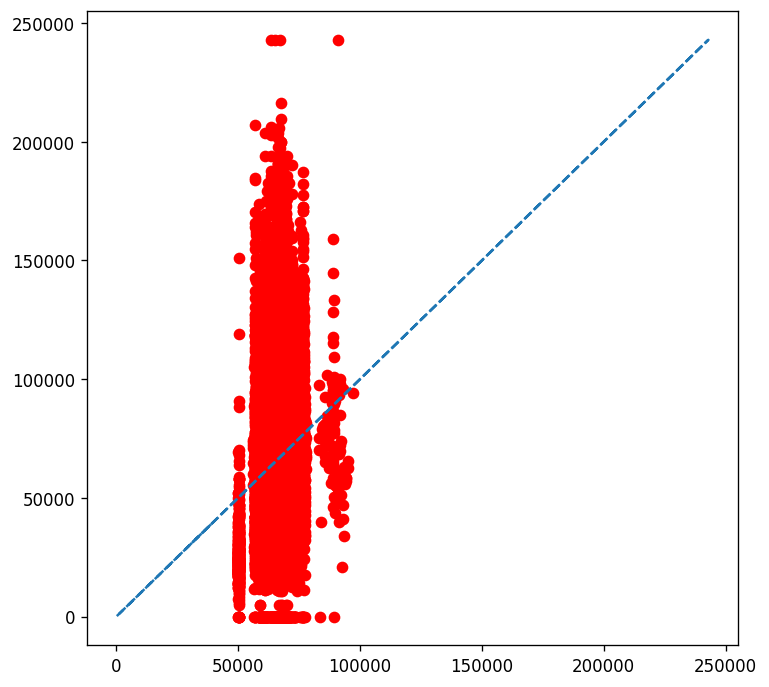

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat,Y,marker ='o',color='red')
ax.plot(Y,Y,ls='--')
plt.show()

¿Cómo calculamos el error?

## 7.3 Ejercicio. 

Considera que ya no solamente usamos Lat y Lon como regresores sino también comenzamos a usar Zip_Code como regresor, ajustar ese modelo nos deja con los siguientes parámetros:
$$
v = 4152.02, \qquad \boldsymbol{\beta} = \begin{bmatrix}6.55490348e+02 \\ -5.75918372e+02 \\ -2.94216316e-01\end{bmatrix}
$$

¿Mejora la preducción al introducir un nuevo regresor?

In [ ]:
def pred2(x):
    beta = np.array([6.5549e2,-5.7591e2,-2.9422e1])
    v = 4152.02
    return x@beta + v

In [ ]:
X2 = df[['Lat','Lon','Zip_Code']].values
Y2_hat = pred2(X2)

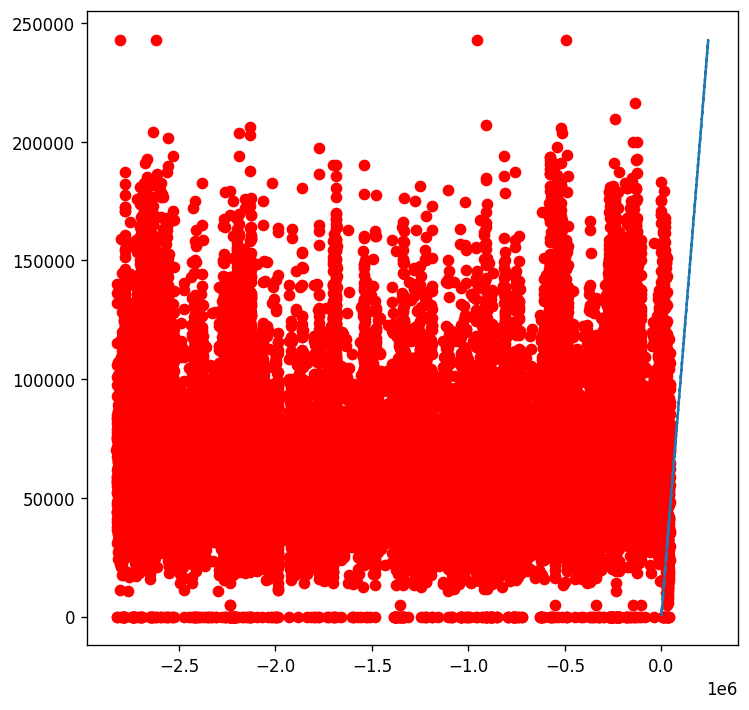

In [ ]:
fig2, ax2 = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax2.scatter(Y2_hat,Y,marker ='o',color='red')
ax2.plot(Y,Y,ls='--')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>